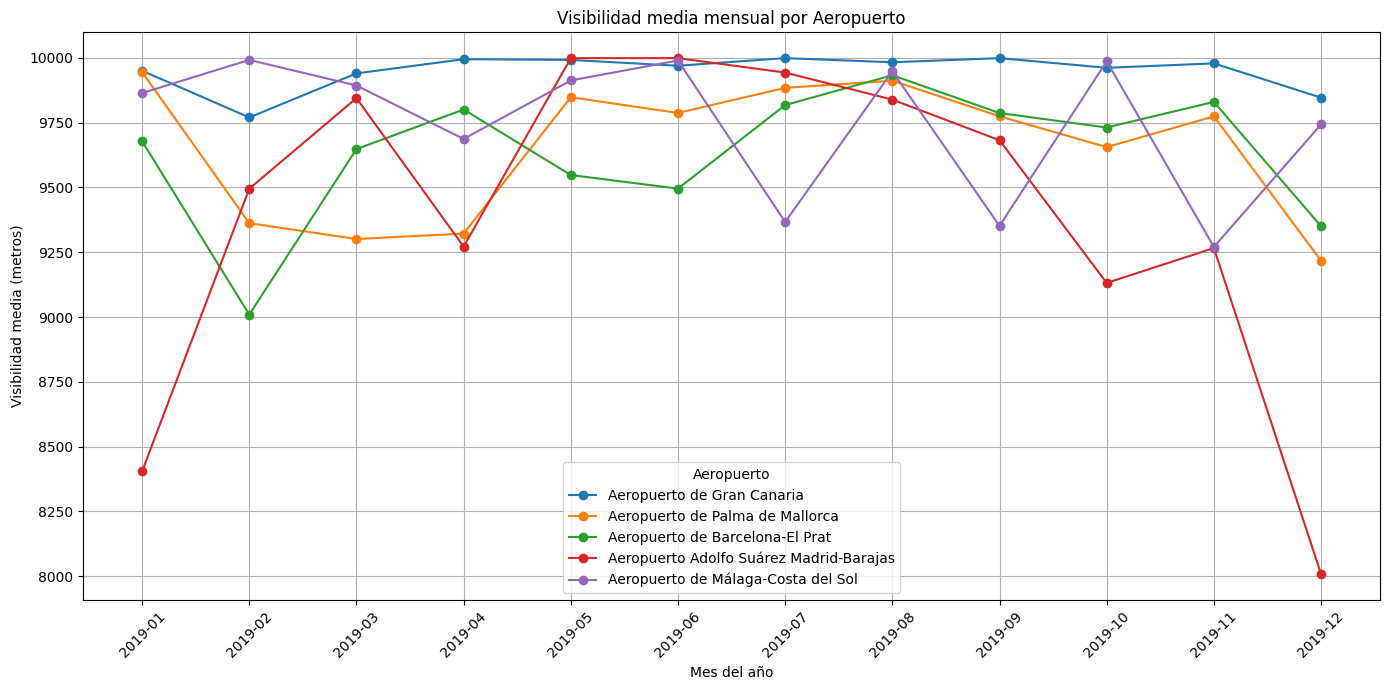

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Nombres de los archivos y aeropuertos con nombres completos para la leyenda
files = {
    'GCLP': 'GCLP_All.csv',
    'LEPA': 'LEPA_All.csv',
    'LEBL': 'LEBL_All.csv',
    'LEMD': 'LEMD_All.csv',
    'LEMG': 'LEMG_All.csv'
}

airport_names = {
    'GCLP': 'Aeropuerto de Gran Canaria',
    'LEPA': 'Aeropuerto de Palma de Mallorca',
    'LEBL': 'Aeropuerto de Barcelona-El Prat',
    'LEMD': 'Aeropuerto Adolfo Suárez Madrid-Barajas',
    'LEMG': 'Aeropuerto de Málaga-Costa del Sol'
}

# Configurar el gráfico
plt.figure(figsize=(14, 7))

# Iterar sobre cada archivo
for airport_code, file_name in files.items():
    # Cargar los datos
    data = pd.read_csv(file_name, low_memory=False)
    
    # Convertir columnas de fecha
    data['dateTime'] = pd.to_datetime(data['dateTime'])
    
    # Extraer el año y mes de cada fecha y crear una nueva columna 'YearMonth'
    data['YearMonth'] = data['dateTime'].dt.to_period('M').astype(str)
    
    # Calcular el promedio mensual de visibilidad
    monthly_visibility = data.groupby('YearMonth')['visibility'].mean().reset_index()
    
    # Crear un gráfico de líneas para cada aeropuerto con su nombre completo
    plt.plot(monthly_visibility['YearMonth'], monthly_visibility['visibility'], marker='o', linestyle='-', label=airport_names[airport_code])

# Añadir título y etiquetas
plt.title('Visibilidad media mensual por Aeropuerto')
plt.xlabel('Mes del año')
plt.ylabel('Visibilidad media (metros)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Aeropuerto')
plt.tight_layout()
plt.show()
